<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Step3 : add new features
</font>
</h1>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')
housing_no_outlier

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,3,steel-concrete comosite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,4,steel-concrete comosite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete comosite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,2,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,3,steel-concrete comosite,0.333,has elevator,no subway,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,4,steel-concrete comosite,0.500,has elevator,no subway,3
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete comosite,0.333,no elevator,no subway,3
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete comosite,0.222,has elevator,has subway,3
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,3,steel-concrete comosite,0.500,has elevator,no subway,3


in this step we want make some new usefull features

<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
φ is latitude
<br>
λ is longitude
<br>
Distance = acos(sinφ1*sinφ2 + cosφ1*cosφ2 * cos(λ2-λ1)) * 6371.0088
</font>
</p>


lng and lat of china capital is 116.4074 and 39.9042.
calculate distance of each house to capital and save it in "distanceToCapitcal"

In [2]:
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = np.arccos(np.sin(capital_Lat)*np.sin(np.radians(housing_capital['Lat']))+np.cos(capital_Lat)*np.cos(np.radians(housing_capital['Lat']))*np.cos(np.radians(housing_capital['Lng'])-capital_Lng))*6371.0088
housing_capital["distanceToCapital"]

0         14.074996
1          4.701224
2         19.293041
3          2.683335
4         10.914652
            ...    
285035    20.402633
285036    20.402633
285037    12.983181
285038    13.519291
285039    14.172716
Name: distanceToCapital, Length: 285040, dtype: float64

in this dataset we have totalPrice and square of each house but we don’t have pricePerSquare. now we want to calculate it and save it in new column.

In [3]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = housing_PPS["totalPrice"]/housing_PPS["square"]*1000
housing_PPS["pricePerSquare"]

0         3167.938931
1         4343.556428
2         2220.149254
3         4839.506173
4         5200.000000
             ...     
285035    2649.031297
285036    2057.976127
285037    3100.598461
285038    3513.751590
285039    4037.232253
Name: pricePerSquare, Length: 285040, dtype: float64

We want to extract information according to our needs by visualize data in various ways. Our data has no missing values, no outliers, and no columns stored in the wrong format. In the first step, we take a look at the histogram of the numerical columns.

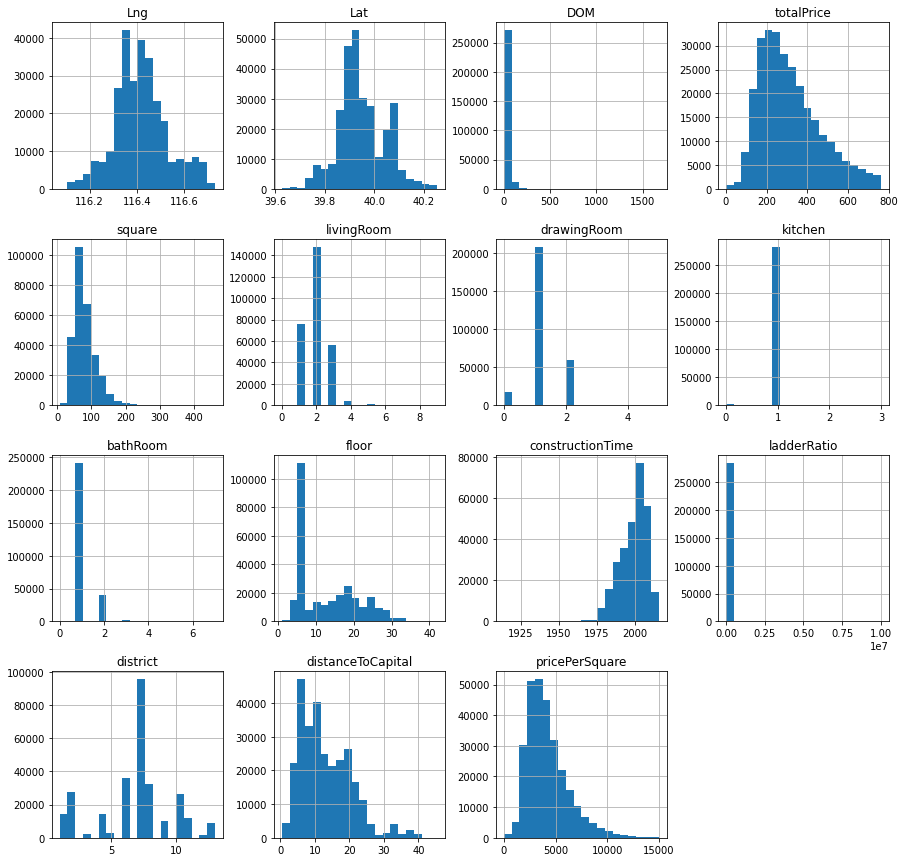

In [11]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

According to the chart above, the price of the house has a curve towards the price of 200 million yuan. Most of the houses were built around 2000. The longest distance from the center of the capital is 40 km. Most houses have two hall rooms. More information can be extracted from this chart.

now we want to see relation of "distanceToCapital" and "pricePerSquare". we can use seaborn regplot function.

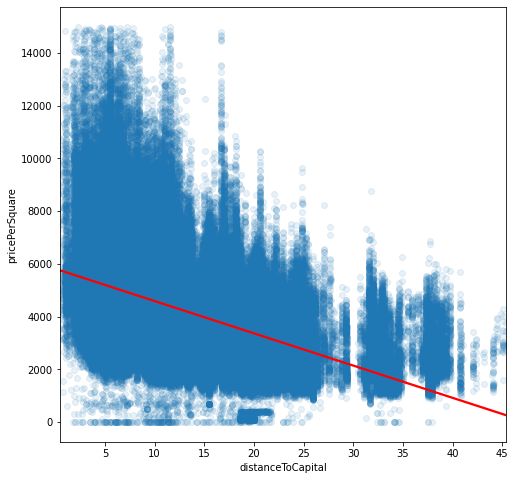

In [12]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

now we want see effectiveness of having elevator in pricePerSquare.one of ways is plotting average price of houses with elevator and houses without elevator

we want our plot like below:
<ul >
  <li>
figure with 6 inch size
</li>
 <li>
background color:‌ <code>red</code>
</li>
<li>
axes face color: <code>#ffffcc</code>
</li>
<li>
figure face color: <code>khaki</code>
</li>
</ul>

<p style="text-align:center;"><img src="output.png"></p>

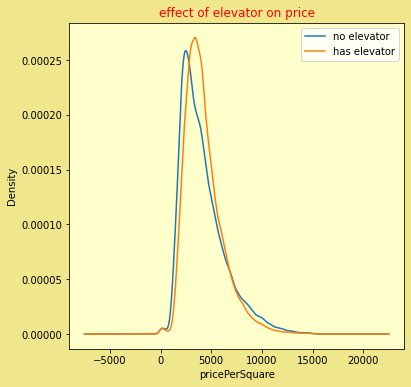

In [13]:

fig, ax = plt.subplots(figsize=(6,6))
housing_PPS[housing_PPS["elevator"]=="no elevator"]["pricePerSquare"].plot(ax = ax, kind="kde" , label="no elevator")
housing_PPS[housing_PPS["elevator"]=="has elevator"]["pricePerSquare"].plot(ax = ax, kind="kde", label="has elevator")
ax.legend()
ax.set_xlabel("pricePerSquare")
ax.set_title("effect of elevator on price" , color="red")
fig.set_facecolor(color = "khaki")
ax.set_facecolor(color="#ffffcc")


save dataset for next step

In [14]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)